# Lung Lesions Detection Using Multimodal data (Chest X-Ray images and Radiology reports) 

# By  Pratyaksh Raj, 244156005

----------------------------------------------------------

# Motivation
Early and accurate detection of different types of lung lesions is critical for timely diagnosis and treatment of serious respiratory conditions such as lung cancer, tuberculosis, and pneumonia. While chest X-ray (CXR) imaging provides a fast and cost-effective visual screening tool, it often suffers from limitations such as overlapping anatomical structures, low contrast, and subtle abnormalities that can be easily missed — especially in early-stage disease. On the other hand, radiology reports written by expert clinicians offer rich semantic information, highlighting suspicious regions, describing abnormal patterns, and contextualizing findings based on clinical judgment.

Combining these two complementary modalities — images and text — creates an opportunity to build a more robust and interpretable detection system. The multimodal approach enables the model to leverage the visual patterns in X-rays along with the clinical language and insights embedded in the reports. 

This can improve diagnostic performance, reduce false negatives, and enhance explainability — a crucial factor in medical AI.

# Connection with Past and Current Work in Multimodal Learning
Earlier efforts in healthcare focused on single modalities, like using CNNs on X-ray images or NLP models on radiology reports. However, researchers soon realized that combining visual and textual modalities could enhance both diagnostic accuracy and interpretability.

Around 2019–2020, studies began exploring joint image-text embeddings using attention-based fusion and encoder-decoder frameworks.
With the advent of transformers and vision-language models like CLIP, ViLT, and MedCLIP (medical adaptation of CLIP), recent research has focused on aligning image and text representations in a shared latent space. These models demonstrated the power of cross-modal supervision — where textual context can guide visual understanding and vice versa.

In this work, I will try to detect different types of lesions and other abnornalities in lungs using YOLOv8 on labelled X-Ray Images, after processing them. And later I will try to explain that by combining the outputs of YOLOv8 model with the Radiology reports, can help to build a model based on multimodal data.

# About the data
The data used here consists of chests X-ray images (Greyscale), with corresponding annotaion files and is taken from kaggle. It has eight thoracic diseases namely, Atelectasis, Cardiomegaly, Effusion, Infiltrate, Mass, Nodule, Pneumonia and Pneumothorax. 

Here, hard masses like nodules, bones and high density regions appear in white, and low density regions like hollow tubes,soft tissues appear as black. Grayscale intensity is based on density.

Here, lesion based ones are only three i.e. Infiltrate, Mass and Nodule. We will classify all eight of them but will keep the model biased towards these three.

It contains 631 training and 159 test images. There are 79 images of nodules, 123 images of infiltrate and 85 images of mass in training set. 

 

# Learning, results and workflow :- 

# Data Preprocessing / Image processing
X-ray Images mostly suffer from low contrast and overlapping anatomical structures. Therefore it's easily possible for human eye to miss some important details. Even ML models can fail to detect objects correctly in these images. 

Therefore Preprocessing is done to images in following way:

1: Increasing contrast and decreasing brightness - It helps to increase visibility of whitish structures in greyscale images 

2: CLAHE(Contrast Limited Adaptive Histogram Equalization) — it’s an advanced version of histogram equalization that enhances image contrast locally, while preventing noise amplification.

3: Gaussian Blurr in applied to reduce noise and smoothen the image.

4: Laplacian kernel is applied to sharpen the edges

In image below, we can clearly see the presence of mass (inside red box) in New processed image, which was a bit to notice in old image.


(-0.5, 636.5, 328.5, -0.5)

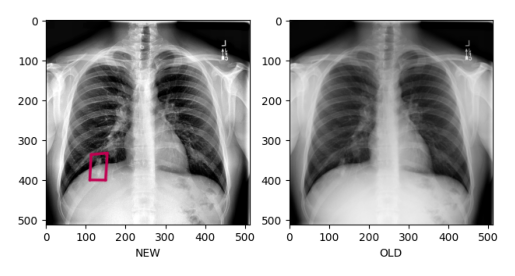

In [183]:
import cv2
import matplotlib.pyplot as plt
img_bgr= cv2.imread('C:/Users/90584/OneDrive/Desktop/images_lungs/Enhanced data/compare_new.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')

Mass shown inside redbox in left image (processed image)

# YOLOv8
YOLOv8 (You Only Look Once, version 8) is a state-of-the-art object detection and segmentation framework that extends the capabilities of traditional convolutional neural networks (CNNs) by incorporating a streamlined, anchor-free design. YOLOv8 operates on the core principle of performing detection as a single-stage regression problem directly from image pixels to bounding box coordinates and class probabilities, enabling real-time performance. It leverages deep CNN backbones for feature extraction, followed by lightweight detection heads for prediction, maintaining high spatial resolution and semantic richness. 

# Training/Results
We trained the YOLOv8 (pre-trained model) via transfer-learning on the processed images. Model has been trained for 50 epoches. Here hyperparameters have been choosen to increases the Recall or lower the False negative of three lesion classes, on validation set.

As whole data was only around 900 images, i have shown results on validation data only. As expected, model was not able to learn well. Only cardiogamaly and mass have  good precision, but model fails to detect other classes. Confusion matrix is shown below.

At 0.5 confidence, cardiomegaly showed highest F1 score of 0.58, followed by Mass at 0.36, than Nodule at 0.13

Possible reason can be the lack of data and due to their similar greyish structure, model started learning based on position of abnormality in image. So, to classify them based on their spatial pattern and pixel values gets challenging.

To make our model more robust to detecting these diseases, its better to include multimodal data. Radiology report and symptoms along with X-Ray features can highly increase the accuracy of the model. Later in improvement section I will discuss this approach and methodology.     

Recall-confidence curve of validation set

(-0.5, 2249.5, 1499.5, -0.5)

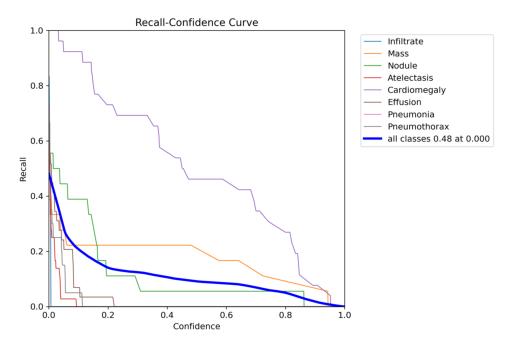

In [184]:
img_bgr= cv2.imread('C:/Users/90584/OneDrive/Desktop/images_lungs/runs/detect/train7/R_curve.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')

Confusion matrix of validation set

(-0.5, 2999.5, 2249.5, -0.5)

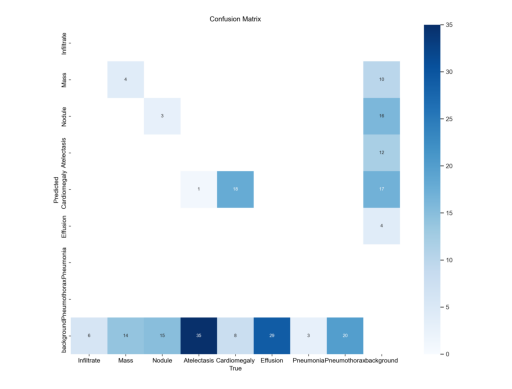

In [185]:
img_bgr= cv2.imread('C:/Users/90584/OneDrive/Desktop/images_lungs/runs/detect/train7/confusion_matrix.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')

# Code

Image processing

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import matplotlib.pyplot as plt
import cv2 
%matplotlib inline


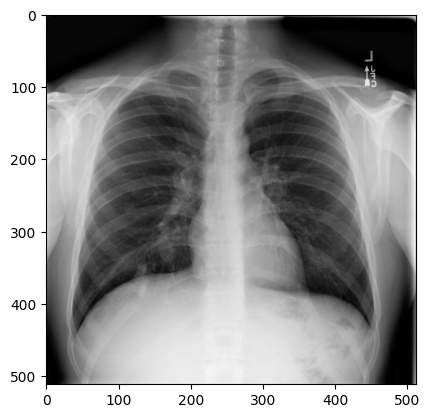

In [166]:
img= cv2.imread('C:/Users/90584/OneDrive/Desktop/images_lungs/chestXray8_512/val/images/00023168_000.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap="gray")

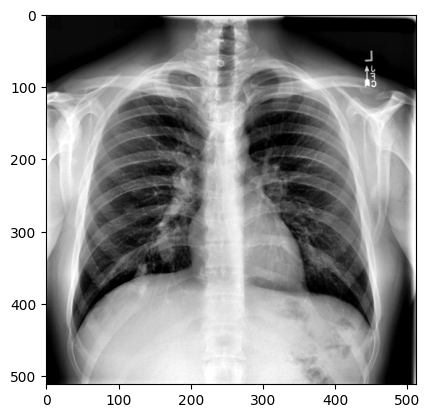

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(5, 5))
img_1 = clahe.apply(img)
plt.imshow(img_1,cmap="gray")

brightness=-10
contrast=1.1
img_2 = cv2.addWeighted(img_1, contrast, np.zeros(img_1.shape, img_1.dtype), 0, brightness) 
plt.imshow(img_2,cmap="gray") 

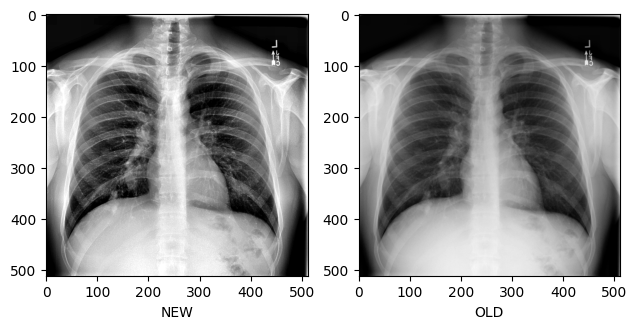

In [ ]:
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]) 
  # Sharpen the image 
img_4 = cv2.filter2D(img_2, -1, kernel)

img_4 = np.uint8(img_4)
img_4 = cv2.addWeighted(img_2,1,img_4,0.2,0)
plt.imshow(img_4,cmap="gray")

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_4,cmap="gray")
axarr[0].set_xlabel("NEW")
axarr[1].imshow(img,cmap="gray")
axarr[1].set_xlabel("OLD")
plt.tight_layout()
# Show the images
plt.show()

In [ ]:
from google.colab import files
from PIL import Image

resized_img = cv2.resize(img_4, (1024, 1024), interpolation=cv2.INTER_AREA)

# Convert to 8-bit unsigned integer (if not already)
resized_img_8bit = np.clip(resized_img, 0, 255).astype(np.uint8)

if len(resized_img_8bit.shape) == 2:
    pil_img = Image.fromarray(resized_img_8bit, mode='L')  # 'L' = 8-bit grayscale
else:
    pil_img = Image.fromarray(cv2.cvtColor(resized_img_8bit, cv2.COLOR_BGR2RGB))
# Save image
filename = "enhanced_val_image.png"
pil_img.save(filename)

Developing annotation files in required format

In [ ]:
import pandas as pd
anno=pd.read_csv("C:/Users/90584/OneDrive/Desktop/images_lungs/chestXray8_512/chestxray8.csv",index_col=0)
anno.rename(columns={'Bbox [x': 'x', 'h]': 'h'}, inplace=True)
anno["Finding Label"].unique()

array(['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltrate', 'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax'], dtype=object)

In [ ]:
anno["x"]=(anno["x"]+(anno["w"])/2)/1024
anno["y"]=(anno["y"]+(anno["h"])/2)/1024
anno["w"]=anno["w"]/1024
anno["h"]=anno["h"]/1024
anno.drop(["Width","Height"], axis=1, inplace=True)

In [46]:
import os

In [ ]:
output_annotations_path = "C:/Users/90584/OneDrive/Desktop/images_lungs/chestXray8_512/train/New labels"
output_annotations_path_val = "C:/Users/90584/OneDrive/Desktop/images_lungs/chestXray8_512/val/New labels"

existing_images = set(os.listdir("C:/Users/90584/OneDrive/Desktop/images_lungs/chestXray8_512/train/images"))
df_train = anno[anno['Image Index'].isin(existing_images)]
existing_images = set(os.listdir("C:/Users/90584/OneDrive/Desktop/images_lungs/chestXray8_512/val/images"))
df_val = anno[anno['Image Index'].isin(existing_images)]

In [ ]:
class_mapping = {'Infiltrate':0, 'Mass':1, 'Nodule':2,'Atelectasis':3, 'Cardiomegaly':4, 'Effusion':5, 'Pneumonia':6, 'Pneumothorax':7}

In [ ]:

for image_name, group in df_train.groupby('Image Index'):
    annotation_file = os.path.join(output_annotations_path, os.path.splitext(image_name)[0] + ".txt")
    with open(annotation_file, "w") as f:
        for _, row in group.iterrows():
            # Convert to YOLO format (class_id, x_center, y_center, width, height)
            class_id = class_mapping[row['Finding Label']]  # Assuming single-class detection, update if needed
            

            # Write YOLO format to the file
            f.write(f"{class_id} {row['x']} {row['y']} {row['w']} {row['h']}\n")
            

for image_name, group in df_val.groupby('Image Index'):
    annotation_file = os.path.join(output_annotations_path_val, os.path.splitext(image_name)[0] + ".txt")
    with open(annotation_file, "w") as f:
        for _, row in group.iterrows():
            # Convert to YOLO format (class_id, x_center, y_center, width, height)
            class_id = class_mapping[row['Finding Label']]  # Assuming single-class detection, update if needed
            

            # Write YOLO format to the file
            f.write(f"{class_id} {row['x']} {row['y']} {row['w']} {row['h']}\n")            

Training the Yolo-v8 model

In [ ]:
!pip install ultralytics --quiet

!pip install -U ipywidgets --quiet

In [ ]:
import numpy as np 
import pandas as pd 
import os
from ultralytics import YOLO

In [ ]:
train_images_path = 'C:/Users/90584/OneDrive/Desktop/images_lungs/chestXray8_512/train/images'
val_images_path = 'C:/Users/90584/OneDrive/Desktop/images_lungs/chestXray8_512/val/images'

class_names =['Infiltrate', 'Mass', 'Nodule','Atelectasis', 'Cardiomegaly', 'Effusion', 'Pneumonia', 'Pneumothorax']

num_classes = len(class_names)
yaml_content = f"""
train: {train_images_path}
val: {val_images_path}

nc: {num_classes}
names: {class_names}
"""
yaml_file_path = 'data.yaml'

In [85]:
with open(yaml_file_path, 'w') as yaml_file:
    yaml_file.write(yaml_content)

In [ ]:
model = YOLO("yolov8n.pt") 
results = model.train(data="data.yaml", epochs=50, imgsz=512)
r_train = model.val(data='data.yaml', split='train')  # or split='val'

100%|██████████| 6.25M/6.25M [00:09<00:00, 696kB/s]


# Reflections :-


# a) Surprising element 
It was surprising to see that even when a Mass is clearly present, Yolo/CNN model failed to detect it. The image I showed in the beginning for comparasion, there is a Mass which not get detected by the model even after doing filtering of that image. This is a case of False Negative or no detection which can be dangerous for life of patient. Therefore until we have nearly all type of scenerios in training Images, these models are not fully relible.

# b) Scope for improvement 
A multimodal learning approach can give far more better results. 

We can combine radiologist reports with the output of Yolo model( like class probabilities, area and position of bounding boxes) and use it as input to finetune a LLM like BERT/GPT.

This means:

- The LLM can reason jointly over visual signal summaries (like lesion location, size, and detection confidence) and linguistic information.

- We're enabling cross-modal understanding, even though we're not directly using image pixels.


# Refrences

1) Proyash Paban Sarma Borah, and Devraj Kashyap. (2024). ChestXray 8 Object Detection Yolo and Pascal VOC [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8614895
2) R. Varghese and S. M., "YOLOv8: A Novel Object Detection Algorithm with Enhanced Performance and Robustness," 2024 International Conference on Advances in Data Engineering and Intelligent Computing Systems (ADICS), Chennai, India, 2024, pp. 1-6, doi: 10.1109/ADICS58448.2024.10533619. keywords: {YOLO;Performance evaluation;Technological innovation;Computer vision;Heuristic algorithms;Speech recognition;Benchmark testing;YOLOv8;Object Detection;Performance Enhancement;Robustness;Computational Efficiency;Computer Vision Systems}
3) https://chatgpt.com/
4) https://openi.nlm.nih.gov/faq?download=true

